In [1]:
#Importing required packages
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('C:/Users/Otiji Lotanna Brian/Desktop/BIG DATA/TERM 2/ADVANCED DATA SCIENCE/Coursework/data science/heart_disease.csv')

In [3]:
df.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
#Checking null values in train dataset
print('columns with null values: \n', df.isnull().sum())

columns with null values: 
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
#data Statistics
df["HeartDiseaseorAttack"].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Text(0, 0.5, 'Income')

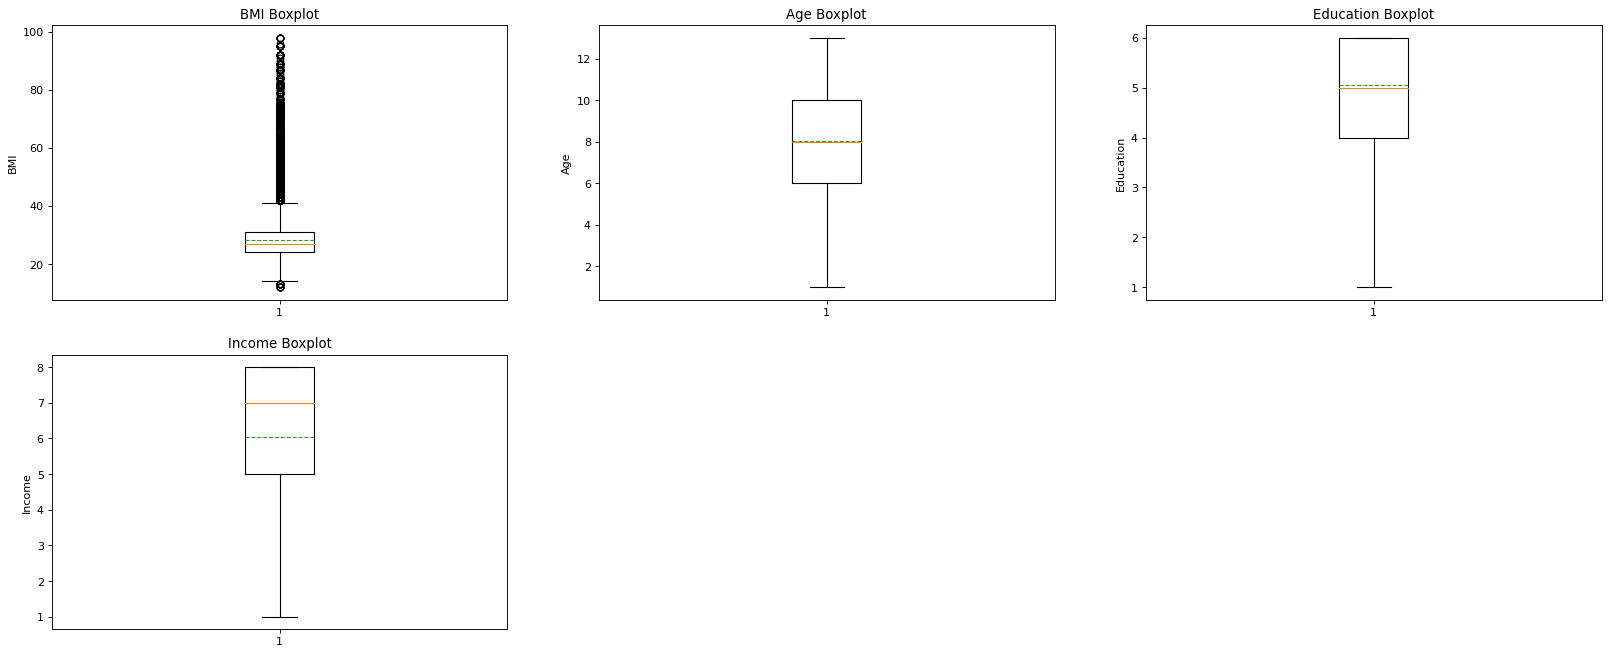

In [43]:
plt.figure(figsize = (25,10), dpi=80) #edit size of plot
plt.subplot(231)
plt.boxplot(x = df["BMI"], showmeans = True , meanline = True)
plt.title('BMI Boxplot')
plt.ylabel('BMI')

plt.subplot(232)
plt.boxplot(x = df["Age"], showmeans = True , meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(x = df["Education"], showmeans = True , meanline = True)
plt.title('Education Boxplot')
plt.ylabel('Education')

plt.subplot(234)
plt.boxplot(x = df["Income"], showmeans = True , meanline = True)
plt.title('Income Boxplot')
plt.ylabel('Income')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
corr =df.corr(method='pearson')
corr

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


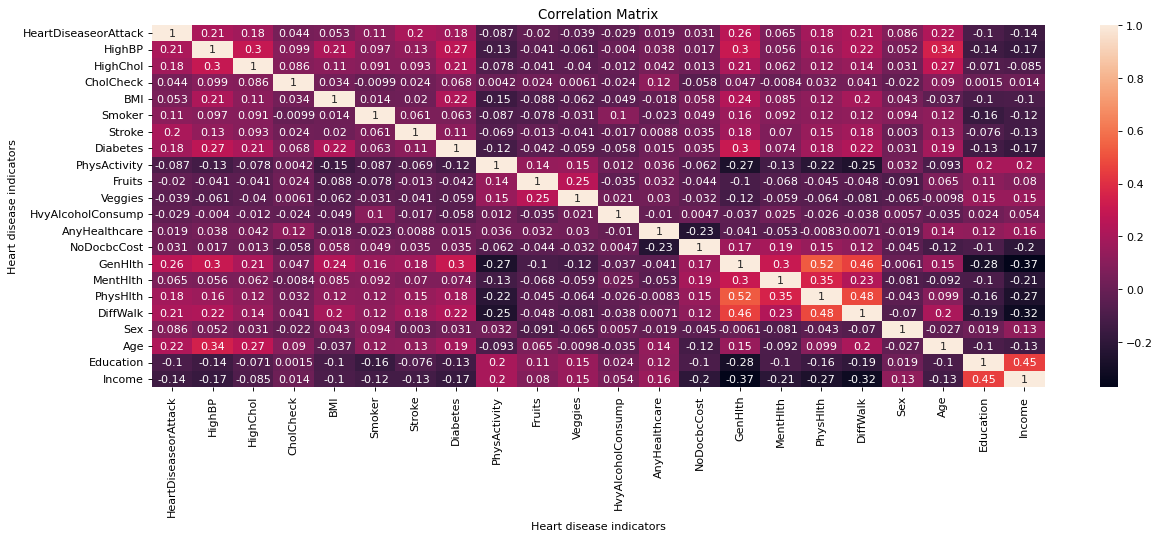

In [10]:
plt.figure(figsize = (18,6), dpi=80) #edit size of plot
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Heart disease indicators')
plt.ylabel('Heart disease indicators')
plt.show()

In [11]:
import numpy as np
#remove duplicate correlation diagonal
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

C:\Users\OTIJIL~1\AppData\Local\Temp/ipykernel_5140/1068859723.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,NaN,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,NaN,NaN,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,NaN,NaN,NaN,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,NaN,NaN,NaN,NaN,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,NaN,NaN,NaN,NaN,NaN,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,NaN,NaN,NaN,NaN,NaN,NaN,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [12]:
#drop both highly correlated columns
drop_column = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0)]
drop_column

['Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [13]:
#Feature selection
label = df['HeartDiseaseorAttack']
features = df.drop(drop_column, axis=1) #drop features with correlation coefficient more than 0.7 and less than 0
features = features.drop('HeartDiseaseorAttack',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HighBP     253680 non-null  float64
 1   HighChol   253680 non-null  float64
 2   CholCheck  253680 non-null  float64
 3   BMI        253680 non-null  float64
 4   Stroke     253680 non-null  float64
 5   Diabetes   253680 non-null  float64
dtypes: float64(6)
memory usage: 11.6 MB


# Its important to drop the correlation values above 0.7 because from the matrix, it could be seen that no  coefficient fell above it except itself which is 1.
# Additional features are manually selected from the matrix for indicators coefficient >0 relative to the HEARTDISEASEORATTACK column.

# These new additions have also proven to be related to heartdisease medically

In [14]:
# Additional features are manually selected from the matrix for indicators coefficient >0 relative to the HEARTDISEASEORATTACK column
new_features  = df[['Smoker','Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']]

In [15]:
features = pd.concat([features, new_features], axis = 1)
features.head()

,HighBP,HighChol,CholCheck,BMI,Stroke,Diabetes,Smoker,Age,GenHlth,MentHlth,PhysHlth,DiffWalk
0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,9.0,5.0,18.0,15.0,1.0
1,0.0,0.0,0.0,25.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,9.0,5.0,30.0,30.0,1.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,11.0,2.0,3.0,0.0,0.0


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HighBP     253680 non-null  float64
 1   HighChol   253680 non-null  float64
 2   CholCheck  253680 non-null  float64
 3   BMI        253680 non-null  float64
 4   Stroke     253680 non-null  float64
 5   Diabetes   253680 non-null  float64
 6   Smoker     253680 non-null  float64
 7   Age        253680 non-null  float64
 8   GenHlth    253680 non-null  float64
 9   MentHlth   253680 non-null  float64
 10  PhysHlth   253680 non-null  float64
 11  DiffWalk   253680 non-null  float64
dtypes: float64(12)
memory usage: 23.2 MB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features[0:50000],label[0:50000], test_size = 0.2, random_state = 42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train[:10]

array([[-0.85489908, -0.85634547,  0.18966867,  1.66472757, -0.21093959,
        -0.42377281,  1.11938081, -0.02642562,  0.47121563, -0.43723227,
        -0.49203077, -0.4489164 ],
       [ 1.16972871,  1.16775302,  0.18966867, -0.1399841 , -0.21093959,
         2.45903539,  1.11938081,  1.58342007, -0.45255545,  0.23610091,
        -0.03402949,  2.22758623],
       [-0.85489908, -0.85634547,  0.18966867, -0.63217819, -0.21093959,
        -0.42377281, -0.89335103,  1.58342007, -1.37632653, -0.43723227,
        -0.49203077, -0.4489164 ],
       [-0.85489908, -0.85634547,  0.18966867, -0.3040488 , -0.21093959,
        -0.42377281, -0.89335103, -2.28020958,  0.47121563, -0.43723227,
        -0.49203077, -0.4489164 ],
       [-0.85489908, -0.85634547,  0.18966867, -0.96030759, -0.21093959,
        -0.42377281, -0.89335103, -0.67036389, -1.37632653, -0.43723227,
        -0.49203077, -0.4489164 ],
       [ 1.16972871,  1.16775302,  0.18966867,  1.17253348, -0.21093959,
        -0.42377281,  

In [20]:
X_test[:10]

array([[ 1.16972871,  1.16775302,  0.18966867,  0.35220999, -0.21093959,
        -0.42377281, -0.89335103,  0.61751266,  0.47121563,  0.9094341 ,
         0.08047082, -0.4489164 ],
       [ 1.16972871, -0.85634547,  0.18966867, -0.4681135 , -0.21093959,
        -0.42377281,  1.11938081,  1.26145093, -0.45255545, -0.43723227,
        -0.49203077, -0.4489164 ],
       [-0.85489908, -0.85634547,  0.18966867, -1.12437229, -0.21093959,
        -0.42377281, -0.89335103, -0.67036389, -0.45255545, -0.43723227,
        -0.49203077, -0.4489164 ],
       [ 1.16972871, -0.85634547,  0.18966867,  1.82879227, -0.21093959,
         1.01763129, -0.89335103, -0.34839475,  1.3949867 ,  3.60276684,
         2.94297878,  2.22758623],
       [-0.85489908, -0.85634547,  0.18966867, -1.12437229, -0.21093959,
        -0.42377281, -0.89335103, -1.95824044, -1.37632653,  0.23610091,
        -0.49203077, -0.4489164 ],
       [ 1.16972871, -0.85634547,  0.18966867,  0.0240806 ,  4.74069387,
        -0.42377281,  

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# RANDOM FOREST CLASSIFIER

In [22]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [23]:
pred_rfc[:20]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [24]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9075
         1.0       0.37      0.12      0.18       925

    accuracy                           0.90     10000
   macro avg       0.64      0.55      0.56     10000
weighted avg       0.87      0.90      0.88     10000

[[8885  190]
 [ 813  112]]


In [29]:
print("Random Forest Classifier Accuracy: ",accuracy_score(y_test, pred_rfc))

Random Forest Classifier Accuracy:  0.8997


# SVM CLASSIFIER

In [25]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [26]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      9075
         1.0       0.55      0.05      0.09       925

    accuracy                           0.91     10000
   macro avg       0.73      0.52      0.52     10000
weighted avg       0.88      0.91      0.87     10000

[[9036   39]
 [ 877   48]]


In [28]:
print("Support Vector Machine Classifier Accuracy: ",accuracy_score(y_test, pred_clf))

Support Vector Machine Classifier Accuracy:  0.9084


In [40]:
#PREDICTING POTENTIAL HEART DISEASE USING A NEW HUMAN HEALTH HISTORY.

Xnew = [[0, 1,0,30,1, 1, 0, 20, 4,0,30,1]]
Xnew = sc.transform(Xnew)
ynew_rfc = rfc.predict(Xnew)
ynew_clf = clf.predict(Xnew)
print("Random forest prediction: ", ynew_rfc)
print("Support Vector machine prediction: ", ynew_clf)

Random forest prediction:  [0.]
Support Vector machine prediction:  [0.]


C:\Users\Otiji Lotanna Brian\anaconda3new\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
